**Steps to be followed to implement the Twitter Sentiment Analysis:**
1. Load the datasets
2. Explore the datasets
3. Preprocess the dataset
4. Data Preparation
   1. Split Data
   2. Feature Engineering using Tf-Idf
5. Model Building
   1. Naive Bayes
   2. Logistic Regression
   3. Model Summary
6. Final Sentiment Analysis pipeline 

# 1. Load the datasets

In [1]:
# Import basic necessary modules
import pandas as pd
import numpy as np
import re
import spacy

# Creating spacy model
nlp = spacy.load("en_core_web_sm")

In [2]:
# Loading training dataset
train_df = pd.read_csv(filepath_or_buffer="../datasets/train.csv")

# Sample of training dataset
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# Loading testing dataset
test_df = pd.read_csv(filepath_or_buffer="../datasets/test.csv")

# Sample of testing dataset
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


# 2. Exploring the dataset

In [4]:
# Info of training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
# Info of testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [6]:
# Shape of training dataset
print("Shape of training dataset:",train_df.shape)

Shape of training dataset: (31962, 3)


In [7]:
# Shape of testing dataset
print("Shape of testing dataset:",test_df.shape)

Shape of testing dataset: (17197, 2)


In [8]:
if (train_df[train_df.notnull()].shape == train_df.shape):
    print("No Null values present in the dataset")
else:
    print("Please remove null values")

No Null values present in the dataset


In [9]:
def is_null_in_dataset(df: pd.DataFrame) -> None:
    if (df[df.notnull()].shape == df.shape):
        print("No Null values present in the dataset")
    else:
        print("Please remove null values")

In [10]:
# Check whether null values are in the dataset or not.
is_null_in_dataset(train_df)

No Null values present in the dataset


In [11]:
is_null_in_dataset(test_df)

No Null values present in the dataset


In [12]:
train_df["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [13]:
# Check whether training dataset is equally distributed or not
train_df["label"].value_counts(normalize=True)*100

0    92.98542
1     7.01458
Name: label, dtype: float64

In [14]:
# Description of the dataframe column
train_df["label"].describe()

count    31962.000000
mean         0.070146
std          0.255397
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [15]:
# check the Skewness of the data
print("Skewness of the data is:",train_df["label"].skew())

Skewness of the data is: 3.366381217473261


In [16]:
# sample tweets in the dataset
train_df["tweet"].sample(10)

27796                          wildlife weekend ððª  
29597    bubbling energy with @user &amp; new faces at ...
21252      @user i'm funny in spanish, i fail in english  
12795    @user why isn't season 3 working.   #ivemissedyou
3742     so sweet thank you guys   bihday   #livinglife...
27886          ?i enjoy seeing the movement of animals?   
9280     black12iwhiteboy - na: #porn #nude #xxx #nasty...
15894    our leadership award winner, mary schuster of ...
11260    be your own kind of beautifulð! #winking   ...
19555      #nationalbestfriendday even though we're tec...
Name: tweet, dtype: object

# 3. Preprocessing the dataset

In [17]:
# Removing user mentions from a sample tweet
tweet = train_df["tweet"][3398]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"@\w+","",tweet))

Before Removal:  @user so many sycophants.....  
After Removal:   so many sycophants.....  


In [18]:
# Removing websites  from a sample tweet
tweet = train_df["tweet"][1111]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"www[\S]+","",tweet))

Before Removal: #fly   #and #better #with #us #buranus  #www.flybcc.com #call #7/24  #airbroker #flightâ¦ 
After Removal: #fly   #and #better #with #us #buranus  # #call #7/24  #airbroker #flightâ¦ 


In [19]:
# Removing &amp; from a sample tweet
tweet = train_df["tweet"][22]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"&amp;","",tweet))

Before Removal: product of the day: happy man #wine tool  who's   it's the #weekend? time to open up &amp; drink up!
After Removal: product of the day: happy man #wine tool  who's   it's the #weekend? time to open up  drink up!


In [20]:
# Removing all special characters like geek letter, hashtags, numbers, punctuations etc., from a sample tweet
tweet = train_df["tweet"][8423]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"[^a-zA-Z]+"," ",tweet))

Before Removal: good morning ððð have a blessed day ð¼ð #goodday #blessed #goodvibes #goodmorning   #healthâ¦ 
After Removal: good morning have a blessed day goodday blessed goodvibes goodmorning health 


In [21]:
# Removing all extra spaces from a sample tweet
tweet = train_df["tweet"][0]
print("Before Removal:",tweet)
print("After Removal:",re.sub(r"\s+"," ",tweet))

Before Removal:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
After Removal:  @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run


In [22]:
# Converting shortcuts to full forms
shortcuts = { "approx" : "approximately", "asap" : "as soon as possible", "brb": "be right back", "bro": "brother", "bruh": "brother",
            "btw" : "by the way", 'cud' : 'could', "cya" : "see you", "dm" : "direct message", "eg" : "example", 'fam' : 'family', 
            "faq" : "frequently asked questions", "fb" : "facebook", 'fud' : 'food', 'fyn' : 'fine', "gn" : "good night", "lol" : "laughing out loud", 
            "luv" : "love", 'lyk' : 'like', "og" : "original", "srsly" : "seriously", "tbh" : "to be honest", "thx" : "thanks", "u" : "you", 
            "ur" : "your", "wassup" : "what is up", 'wud' : 'would', "zzz" : "sleeping bored and tired" }
tweet = train_df["tweet"][2007]
print("Before Conversion:",tweet)
print("After Conversion:"," ".join([shortcuts[word] if word in shortcuts.keys() else word for word in tweet.split()]))

Before Conversion: we absolutely need it! thx u 
After Conversion: we absolutely need it! thanks you


In [23]:
# Function to preprocess the tweet
def preprocess_tweet(tweet: str) -> str:
    
    # convert tweet to lowercase
    tweet = tweet.lower()

    # Remove all user mentions in a tweet
    tweet = re.sub(r"@\w+","",tweet)

    # Remove all webistes in a tweet
    tweet = re.sub(r"www[\S]+","",tweet)

    # Remove "&amp;"" i.e., & in a tweet
    tweet = re.sub(r"&amp;","",tweet)

    # Remove all special characters like geek letter, hashtags, numbers, punctuations etc., from a tweet
    tweet = re.sub(r"[^a-zA-Z']+"," ",tweet)

    # Remove all the extra spaces from the tweet
    tweet = re.sub(r"\s+"," ",tweet)

    # Convert all shortcuts text to their original forms
    tweet = " ".join([shortcuts[word] if word in shortcuts.keys() else word for word in tweet.split()])

    # create a doc object for tweet
    doc = nlp(tweet)

    # creating lemmatized tokens (Contractions like you're, what's will be also be converted to "you are" and "what is")
    # Remove stop-words and lemmatize the tweet
    tweet = " ".join([token.lemma_ for token in doc if token.is_stop == False])

    # Removing apostrophe if there are any!
    tweet = re.sub(r"'","",tweet)

    return tweet

In [25]:
# Clean all tweets of training dataset
train_df["cleaned_tweet"] = train_df["tweet"].apply(preprocess_tweet)
train_df.head()

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use cause offer wheelchair v...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love time
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [26]:
# Clean all tweets of testing dataset
test_df["cleaned_tweet"] = test_df["tweet"].apply(preprocess_tweet)
test_df.head()

,id,tweet,cleaned_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie s
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harrypott...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...


In [27]:
# words in each cleaned tweet
train_df["words"] = train_df["cleaned_tweet"].apply(lambda x: [word for word in x.split()])
train_df.head()

,id,label,tweet,cleaned_tweet,words
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use cause offer wheelchair v...,"[thank, lyft, credit, use, cause, offer, wheel..."
2,3,0,bihday your majesty,bihday majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,model love time,"[model, love, time]"
4,5,0,factsguide: society now #motivation,factsguide society motivation,"[factsguide, society, motivation]"


In [28]:
# words in each cleaned tweet
test_df["words"] = test_df["cleaned_tweet"].apply(lambda x: [word for word in x.split()])
test_df.head()

,id,tweet,cleaned_tweet,words
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife require passion dedication ...,"[studiolife, aislife, require, passion, dedica..."
1,31964,@user #white #supremacists want everyone to s...,white supremacist want new bird movie s,"[white, supremacist, want, new, bird, movie, s]"
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing,"[safe, way, heal, acne, altwaystoheal, healthy..."
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation yes harrypott...,"[hp, cursed, child, book, reservation, yes, ha..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd bihday amazing hilarious nephew eli ahmir u...,"[rd, bihday, amazing, hilarious, nephew, eli, ..."


In [35]:
# positive and negative words in the dataset
positive_words = " ".join([word for words in train_df["words"].loc[train_df["label"] == 0] for word in words])
negative_words = " ".join([word for words in train_df["words"].loc[train_df["label"] == 1] for word in words])

print(positive_words)
print(negative_words)

father dysfunctional selfish drag kid dysfunction run thank lyft credit use cause offer wheelchair van pdx disapointe getthanke bihday majesty model love time factsguide society motivation huge fan fare big talk leave chaos pay dispute allshowandnogo camping tomorrow danny school year year exam think school exam hate imagine actorslife revolutionschool girl win love land allin cavs champions cleveland clevelandcavalier welcome gr ireland consumer price index mom climb previous blog silver gold forex selfish orlando standwithorlando pulseshoote orlandoshooting biggerproblem selfish heabreake value love daddy today day gettingfe ouch junior angry get junior yugyoem omg thankful have paner thankful positive friday smile ig user cookie people know essential oil chemical euro people blame ha concede goal fat rooney give away free kick know bale hit sad little dude badday coneofshame cat piss funny laugh product day happy man wine tool weekend time open drink tgif ff gamedev indiedev indiega

In [36]:
# import libraries of wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [75]:
def generate_wordcloud(data: str, title: str) -> None:
    # create word cloud instance
    wc = WordCloud(width=800, height=500, max_words=200, max_font_size=100, background_color="white").generate(data)

    # Setting the figure size
    plt.figure(figsize=(12,12))

    # Display word cloud as a image
    plt.imshow(wc, interpolation="bilinear", cmap="viridis")

    # Remove all the axes
    plt.axis("off")

    # set title to the wordcloud
    plt.title(title, color="orange", fontdict={"fontsize":20, "fontweight": 700}, pad=50.5)

    # Display the wordcloud
    plt.show()

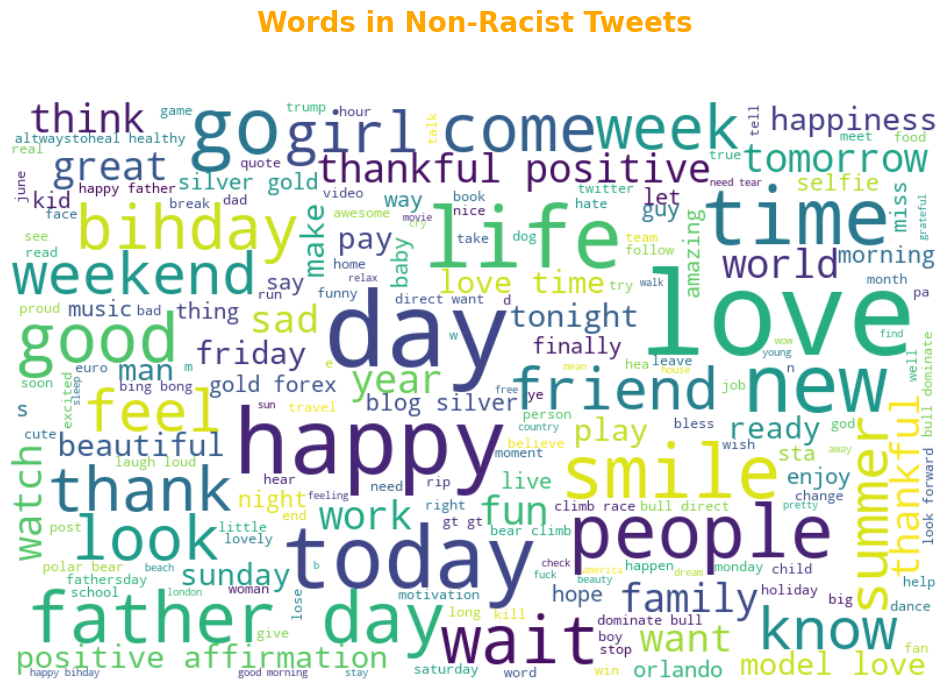

In [77]:
# Display wordcloud for positive words
generate_wordcloud(positive_words, "Words in Non-Racist Tweets")

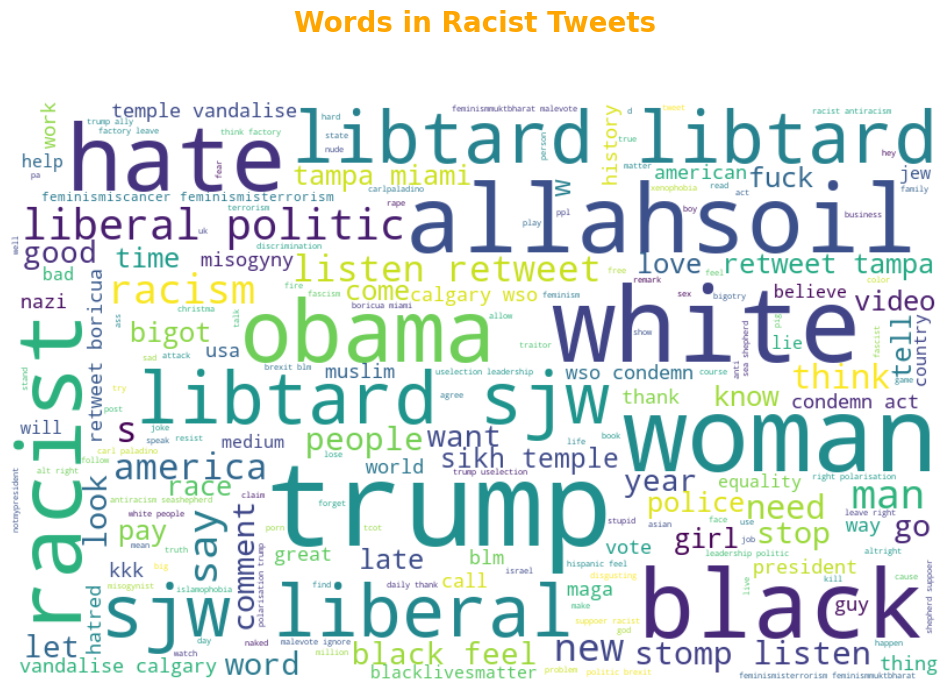

In [78]:
# Display wordcloud for negative words
generate_wordcloud(negative_words, "Words in Racist Tweets")